## Check Ant2 morphology rotation with inclusion of LMC.

In [1]:
## Plotting major axis (1sigma & 2sigma) on RA vs. Dec projection

In [19]:
from galpy.orbit import Orbit
from galpy.util import conversion
from galpy.potential import MWPotential2014, ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.potential.mwpotentials import McMillan17
#from galpy.df import streamspraydf
from streamtools.df import streamspraydf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
ro = conversion.get_physical(McMillan17)['ro']
vo = conversion.get_physical(McMillan17)['vo']
to = conversion.time_in_Gyr(ro=ro, vo=vo)
mo = conversion.mass_in_msol(ro=ro, vo=vo)

pot = McMillan17
mass_ant = 10**7.92 #msol
scale = 1 #kpc
tdisrupt = 5

# from kinematics paper
ant2 = Orbit([143.8017, -36.6991, 131.8, -0.094, 0.103, 288.8], ro=ro, vo=vo, radec=True)

# from pace data
ant2_ = Orbit([143.8868, -36.7673, 132.0, -0.0928385269606818, 0.0999082937338185, 290.7], ro=ro, vo=vo, radec=True)

## Without LMC

In [21]:
spdf_noLMC = streamspraydf(mass_ant/mo,
                          progenitor = ant2,
                          pot = pot,
                          tdisrupt = tdisrupt)
spdft_noLMC = streamspraydf(mass_ant/mo,
                           progenitor = ant2,
                           pot = pot,
                           tdisrupt = tdisrupt/to,
                           leading=False)

In [23]:
RvR, dt = spdf_noLMC.sample(n=100, returndt=True, integrate=True)
RvRt, dtt = spdft_noLMC.sample(n=100, returndt=True, integrate=True)

vxvv=np.column_stack([RvR[0],RvR[1],RvR[2],RvR[3],RvR[4],RvR[5]])
vxvvt=np.column_stack([RvRt[0],RvRt[1],RvRt[2],RvRt[3],RvRt[4],RvRt[5]])

vxvva=np.column_stack([np.append(RvR[0],RvRt[0]),
                       np.append(RvR[1],RvRt[1]),
                       np.append(RvR[2],RvRt[2]),
                       np.append(RvR[3],RvRt[3]),
                       np.append(RvR[4],RvRt[4]),
                       np.append(RvR[5],RvRt[5])])

#oleading=Orbit(vxvv,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
#otrailing=Orbit(vxvvt,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])

oall_noLMC=Orbit(vxvva,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
dtall=np.append(dt,dtt)

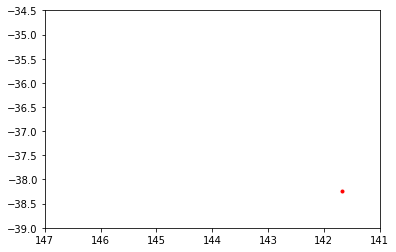

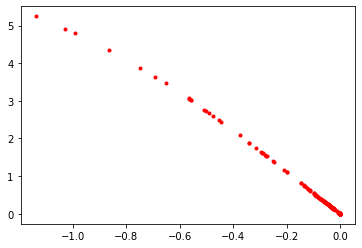

In [24]:
plt.plot(oall_noLMC.ra(), oall_noLMC.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.show();

plt.plot(oall_noLMC.pmra(), oall_noLMC.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC, no acceleration

In [26]:
mass_lmc=1.5e11 #solar masses
rscale_lmc=10.2 #kpc

#Initialize and integrate the orbit of the LMC
#Note orbit has to be integrated back 5 Gyr
#Note we assume the LMC experienced dynamical friction due to MW
o_lmc = Orbit.from_name('LMC', ro=ro, vo=vo, solarmotion=[-11.1, 24.0, 7.25])
ts= np.linspace(0.,-tdisrupt/to,1001)
cdf= ChandrasekharDynamicalFrictionForce(GMs=mass_lmc/mo, rhm=rscale_lmc/ro, dens=pot[0], ro=ro,vo=vo)
o_lmc.integrate(ts,pot+cdf)

#Setup a moving Hernquist potential to represent the LMC
pot_lmc = HernquistPotential(mass_lmc/mo,rscale_lmc/ro,ro=ro,vo=vo)
moving_pot_lmc = MovingObjectPotential(o_lmc, pot_lmc,ro=ro,vo=vo)

#Add the moving Hernquest potential to the MW
total_pot = [pot]
total_pot += [moving_pot_lmc]

/home/student04/.local/lib/python3.10/site-packages/galpy/df/jeans.py:50: RuntimeWarning: invalid value encountered in sqrt
  return numpy.sqrt(integrate.quad(lambda x: -intFactor(x)*dens(x)



In [27]:
spdf_LMC = streamspraydf(mass_ant/mo,
                          progenitor = ant2,
                          pot = pot + moving_pot_lmc,
                          tdisrupt = tdisrupt,
                          centerpot=pot)
spdft_LMC = streamspraydf(mass_ant/mo,
                           progenitor = ant2,
                           pot = pot + moving_pot_lmc,
                           tdisrupt = tdisrupt/to,
                           centerpot=pot,
                           leading=False)

In [28]:
RvR, dt = spdf_LMC.sample(n=100, returndt=True, integrate=True)
RvRt, dtt = spdft_LMC.sample(n=100, returndt=True, integrate=True)

vxvv=np.column_stack([RvR[0],RvR[1],RvR[2],RvR[3],RvR[4],RvR[5]])
vxvvt=np.column_stack([RvRt[0],RvRt[1],RvRt[2],RvRt[3],RvRt[4],RvRt[5]])

vxvva=np.column_stack([np.append(RvR[0],RvRt[0]),
                       np.append(RvR[1],RvRt[1]),
                       np.append(RvR[2],RvRt[2]),
                       np.append(RvR[3],RvRt[3]),
                       np.append(RvR[4],RvRt[4]),
                       np.append(RvR[5],RvRt[5])])

#oleading=Orbit(vxvv,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
#otrailing=Orbit(vxvvt,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])

oall_LMC=Orbit(vxvva,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
dtall_LMC=np.append(dt,dtt)

PotentialError: "'_R2deriv' function not implemented for this potential"

In [ ]:
plt.plot(oall_LMC.ra(), oall_LMC.dec(), 'r.')
#plt.plot(orbst_LMC.ra(), orbst_LMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.show();

plt.plot(orbs_LMC.pmra(), orbs_LMC.pmdec(), 'r.')
#plt.plot(orbst_LMC.pmra(), orbst_LMC.pmdec(), 'b.')
plt.show()

## With LMC & acceleration

In [ ]:
from galpy.potential import (evaluateRforces, evaluatephitorques,
                                 evaluatezforces)
loc_origin= 1e-4 # Small offset in R to avoid numerical issues
ax= lambda t: evaluateRforces(moving_pot_lmc,loc_origin,0.,phi=0.,t=t,
                                use_physical=False)
ay= lambda t: evaluatephitorques(moving_pot_lmc,loc_origin,0.,phi=0.,t=t,
                                use_physical=False)/loc_origin
az= lambda t: evaluatezforces(moving_pot_lmc,loc_origin,0.,phi=0.,t=t,
                                use_physical=False)

t_intunits= o_lmc.time(use_physical=False)[::-1] # need to reverse the order for interp
ax4int= np.array([ax(t) for t in t_intunits])
ax_int= lambda t: np.interp(t,t_intunits,ax4int)
ay4int= np.array([ay(t) for t in t_intunits])
ay_int= lambda t: np.interp(t,t_intunits,ay4int)
az4int= np.array([az(t) for t in t_intunits])
az_int= lambda t: np.interp(t,t_intunits,az4int)

from galpy.potential import NonInertialFrameForce
nip= NonInertialFrameForce(a0=[ax_int,ay_int,az_int])

In [ ]:
spdf_LMC_a = streamspraydf(mass_ant/mo,
                          progenitor = ant2,
                          pot = pot + moving_pot_LMC + nip,
                          tdisrupt = tdisrupt,
                          centerpot=pot)
spdft_LMC_a = streamspraydf(mass_ant/mo,
                           progenitor = ant2,
                           pot = pot + moving_pot_LMC + nip,
                           tdisrupt = tdisrupt/to,
                           centerpot=pot,
                           leading=False)

In [ ]:
RvR, dt = spdf_LMC_a.sample(n=100, returndt=True, integrate=True)
RvRt, dtt = spdft_LMC_a.sample(n=100, returndt=True, integrate=True)

vxvv=np.column_stack([RvR[0],RvR[1],RvR[2],RvR[3],RvR[4],RvR[5]])
vxvvt=np.column_stack([RvRt[0],RvRt[1],RvRt[2],RvRt[3],RvRt[4],RvRt[5]])

vxvva=np.column_stack([np.append(RvR[0],RvRt[0]),
                       np.append(RvR[1],RvRt[1]),
                       np.append(RvR[2],RvRt[2]),
                       np.append(RvR[3],RvRt[3]),
                       np.append(RvR[4],RvRt[4]),
                       np.append(RvR[5],RvRt[5])])

#oleading=Orbit(vxvv,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
#otrailing=Orbit(vxvvt,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])

oall_LMC_a=Orbit(vxvva,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
dtall_LMC_a=np.append(dt,dtt)

In [ ]:
plt.plot(oall_LMC_a.ra(), oall_LMC_a.dec(), 'r.')
#plt.plot(orbst_LMC_a.ra(), orbst_LMC_a.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.show();

plt.plot(orbs_LMC_a.pmra(), orbs_LMC_a.pmdec(), 'r.')
#plt.plot(orbst_LMC_a.pmra(), orbst_LMC_a.pmdec(), 'b.')
plt.show()